# Deep Neutral Net Implementation

## Purpose

The purpose of this notebook to implement a deep neural network in PyTorch to classify a more complex dataset. A deep neutral network is a model with n number of hidden layers (in this case there are 4 hidden layers). 

## Imports

In [0]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

##Preparing the data

We are creating a dataset that has two distinct circular clusters of data:

In [0]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)


#'X' is the coordinates of our generated points
# 'y' are the labels for these points, in this case there are only 2 clusters so the labels are 0 and 1

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500,1)) #we do this reshape for the training step because the optimizer wants the labels in this format

In [0]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

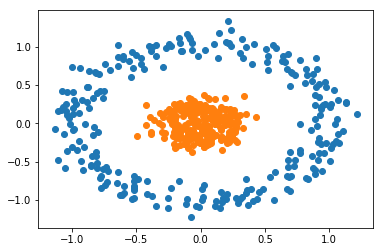

In [0]:
scatter_plot()

##Creating the model

Since this dataset isn't linearly seperable, we have to add a hidden layer to fit this data.

In [0]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    print(x.size())
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred > 0.5:
      return 1
    else:
      return 0
    

In [0]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


##Training the model

Adam will be used as our optimizer since Adam has  adaptive learning rates meaning that the learing rate changes throughout training. This has been proven to yield better results than using a fixed learning rate.

In [0]:
criterion = nn.BCELoss() # binary cross entropy loss function
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1) # Adam for optimization algorithm. 

In [0]:
epochs = 1000 # I am not worried about overfitting for this simple problem so I am going to use more epochs than neccessary
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch: ", i)
  print("loss:", loss.item())
  
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  
  

torch.Size([500, 4])
epoch:  0
loss: 0.7148522138595581
torch.Size([500, 4])
epoch:  1
loss: 0.6947312355041504
torch.Size([500, 4])
epoch:  2
loss: 0.6955161094665527
torch.Size([500, 4])
epoch:  3
loss: 0.7014897465705872
torch.Size([500, 4])
epoch:  4
loss: 0.7013992667198181
torch.Size([500, 4])
epoch:  5
loss: 0.697472095489502
torch.Size([500, 4])
epoch:  6
loss: 0.6939275860786438
torch.Size([500, 4])
epoch:  7
loss: 0.6928625106811523
torch.Size([500, 4])
epoch:  8
loss: 0.693941593170166
torch.Size([500, 4])
epoch:  9
loss: 0.6954426765441895
torch.Size([500, 4])
epoch:  10
loss: 0.6958808302879333
torch.Size([500, 4])
epoch:  11
loss: 0.6949241757392883
torch.Size([500, 4])
epoch:  12
loss: 0.693157970905304
torch.Size([500, 4])
epoch:  13
loss: 0.6914014220237732
torch.Size([500, 4])
epoch:  14
loss: 0.6901755332946777
torch.Size([500, 4])
epoch:  15
loss: 0.6894775629043579
torch.Size([500, 4])
epoch:  16
loss: 0.6888664364814758
torch.Size([500, 4])
epoch:  17
loss: 0.6877

Text(0.5, 0, 'Epoch')

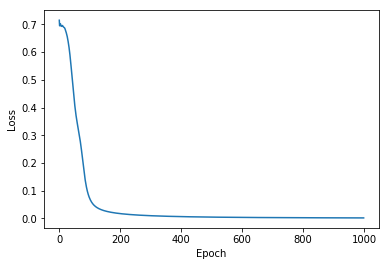

In [0]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Testing the Model

In [0]:
# this entire function is simply for creating the contour graph shown below.
def plot_decission_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25) # this is getting the span of our x values in our training data so we can create a good plot. Note that the +/- 0.25 is just for adding some tolerance (spacing) around our graph.
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25) # this is getting the span of our y values in our training data so we can create a good plot. Note that the +/- 0.25 is just for adding some tolerance (spacing) around our graph.
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) # flatten xx and yy and then make a grid out of thier values
  pred_func = model.forward(grid) # making predictions
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

torch.Size([2500, 4])


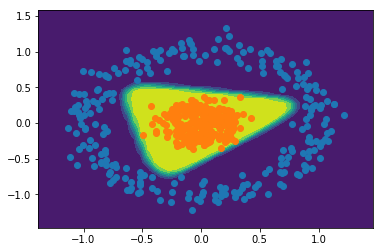

In [0]:
plot_decission_boundary(X, y)
scatter_plot()

From the above contour graph we can see that our model did good job of seperating the data. Note that the middle region (yellow region) is the area with the highest probabilities (closest to the "1" class) and the other region (in blue) corresponds to the area where the probailties are closest to 0 (our other class)

torch.Size([4])
Prediction is:  1
torch.Size([2500, 4])


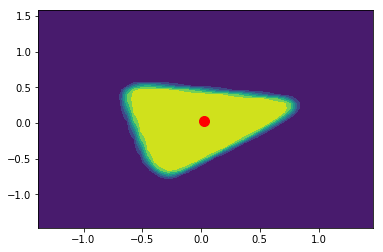

In [0]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker = 'o', markersize = 10, color = "red")
print("Prediction is: ", prediction)
plot_decission_boundary(X, y)